# Geometric Shape Generation and Classification
The purpose of this mini-project is to evaluate your ability to generate a dataset
of synthetic shapes and to train a model to classify them. The project consists
of the following tasks:
1. Generate a synthetic dataset of shapes, such as rectangles, triangles, and
ellipses, with random position, orientation, and color. The dataset should
be sufficiently large and varied to allow for robust training and testing of
the model. You are encouraged to be creative in the design of the dataset.
(Note: the generation can be done using simple computer vision tools,
there is no need to use a big model such as a neural network)
2. Define success metrics to evaluate the performance of the model. These
metrics should be appropriate for the classification task and the nature of
the dataset.
3. Train a classification model on the dataset and evaluate its performance
on a held-out test set. You are free to choose the model architecture and
the training algorithm, but the model should achieve high accuracy on the
test set.



# Approach : 

* Runtime :GPU was set and I used cuda 
* I chose to build almost everything from scratch and try maximum not to use OpenCV  , I used it for drawing the shapes mainly.
##### Dataset Generation : 
* Made basic from scratch functions in Python and PyTorch to generate each shape  
  * Main functions: rectangle,triangle , ellipse,
  * Helper function: random_point and random_color.

##### Multiclass Classification: 
  * A CNN was utilized for multiclass classification with SGD as an Optimizer and CrossEntropy as loss function .
  * for training : learning rate was set to 0.001 through 32 batches .




# Remarks 

*   Dataset Generation : 
  * The Shapes considered are : rectangle , triangle and Ellipse.
  * All shapes have a random position, color ,orientation .
  * The dataset generated is balanced ,meaning the number of images is equal for each shape. 2500 images total


* Encountered challenges while dataset generation :
  * Shapes generated were not consistent meaning for example an ellipse at first was generated with half of it outside the image bounds which makes it half an ellipse . a similar problem with triangles and rectangles.

* The approach was to update and change the functions of generation to make the shapes more consistent and less distorted to improve the accuracy.

* The idea is that it's a perfect dataset , with no distortions , while in real life , shapes are colluded, confused , and mostly distorted which means that the first dataset generated was logicially more realistic .


* Encountered challenges and solutions while training a classification model :
  * Test accuracy for the first generated dataset was 36.31 % because the dataset was inconsistent ( shapes distored).
  * After fixing the consistency in shapes for the triangle and the rectangle the test accuracy went up to 71.4 %.
  * After finally fixing the ellipse generation inconsitency , the accuracy went up to 94 %.

* In a more realistic scenario , I would have focused on improving identification of patterns in shapes without having their full obvious shapes which means tuning the CNN architecture itself .

* CNN 3 Class Classifier Training:
  * After testing several CNN architectures while changing the number and type of layer , that gave test accuracy between 90.1 and 94.6 , I settled for one that gave :
  * Results shown in classifciation report .
  

* Test Accuracy Change over the phases of change in dataset generation ;
  * First training loss : 38.8 %
  * Second training loss : 71.4 %
  * Third training loss : 94.4

* Generated dataset is changing every time runtime is restarted so the matrics change .
* I chose not to set seed to be able to view the different changes of accuracy between each dataset which seems to vary between 91. and 94 .

* Classification report is bellow .


In [ ]:
!pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu111/torch_stable.html


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html


In [ ]:
# Necessary Imports
import os # Interact with OS
import torch # PyTorch package
import numpy as np # Array manipulation
import matplotlib.pyplot as plt
import torchvision # Load tools for computer vision tasks
import torchvision.transforms.functional as F # Vision Preprocessing Transform Opeartions
# Image : Provides function to Create and Manipulate Images
# ImageDraw : Provides function to draw images
from PIL import Image, ImageDraw
import torchvision.transforms as transforms # Vision Transform Operations
import torch.nn as nn # Pytorch NNs 
import torch.nn.functional as F # Pytorch NN operations, activations, loss ...
import torch.optim as optim #  Optimization algorithms
from torchvision.datasets import ImageFolder # 
from sklearn.metrics import classification_report

In [ ]:
# Define a directory to save the generated images
dir = "generated_shapes_dataset"
# Create directory
os.makedirs(dir, exist_ok=True)
# Create Subdirsrepresenting the different shapes
os.makedirs(os.path.join(dir,"rectangle"))
os.makedirs(os.path.join(dir,"triangle"))
os.makedirs(os.path.join(dir,"ellipse"))

In [ ]:
# Define size of dataset or number of images to be generated
dataset_size = 2500
image_size = (400,400)

In [ ]:
# Function to generate a random color
def random_color():
  """
  Generates a random values color tuple.
  input : none.
  output : tuple representing a color .
  
  """
  return tuple(torch.randint(0,256,size=(3,),dtype=torch.uint8).tolist())

# Function to generate random coordinates
def random_point(bounds):

  """
  Generates random coordinates (x,y) within the bounds for a point.
  input : bounds ( upper height and width ).
  output : tuple of two coordinates.
  """

  return tuple(torch.randint(bound, image_size[0] - bound, size=(1,)).item() for bound in bounds)


In [ ]:
# Function to generate a rectangle
def generate_rectangle(image_size):
    bounds = torch.randint(50, 200, size=(2,))
    pt1 = random_point(bounds)
    pt2 = (pt1[0] + bounds[0], pt1[1] + bounds[1])
    color = random_color()
    return pt1, pt2, color

# Function to generate a triangle
def generate_triangle(image_size):
    bounds = torch.randint(50, 200, size=(2,))
    pt1 = random_point(bounds)
    pt2 = (pt1[0] + bounds[0], pt1[1] + bounds[1])
    pt3 = (pt1[0] + bounds[0] // 2, pt1[1])
    color = random_color()
    return pt1, pt2, pt3, color

# Function to generate an ellipse
def generate_ellipse(image_size):
    bounds = torch.randint(50, 200, size=(2,))
    center = random_point(bounds)
    axes = (bounds[0] // 2, bounds[1] // 2)
    angle = torch.randint(0, 360, size=(1,)).item()
    color = random_color()
    return center, axes, angle, color

# Directory to save the generated images
save_dir = "generated_shapes_images_dataset"
os.makedirs(save_dir, exist_ok=True)

# Generate and save images
for i in range(10):  # Generate 10 images
    # Create a black image with a white background
    image_size = (800, 800)
    image = Image.new("RGB", image_size, (255, 255, 255))

    # Generate rectangles
    for _ in range(5):
        pt1, pt2, color = generate_rectangle(image_size)
        draw = ImageDraw.Draw(image)
        draw.rectangle((pt1, pt2), fill=color)

    # Generate triangles
    for _ in range(5):
        pt1, pt2, pt3, color = generate_triangle(image_size)
        draw = ImageDraw.Draw(image)
        draw.polygon((pt1, pt2, pt3), fill=color)

    # Generate ellipses
    for _ in range(5):
        center, axes, angle, color = generate_ellipse(image_size)
        draw = ImageDraw.Draw(image)
        draw.ellipse(((center[0] - axes[0], center[1] - axes[1]), (center[0] + axes[0], center[1] + axes[1])),
                     fill=color, outline=color)

    # Save the generated image
    image_filename = os.path.join(save_dir, f"shape_{i+1}.png")
    image.save(image_filename)

print(f"Generated images saved to directory: {save_dir}")


# Multiclass Classification

In [ ]:
# Load Images & Preprocess them
transform = transforms.Compose(
    [transforms.ToTensor(), #
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #
     ])


batch_size=32


In [ ]:
# Load generated dataset and apply transformation 
train_dataset = ImageFolder(root='generated_shapes_dataset', transform=transform)

In [ ]:
# Set train and test size
train_size = int(0.8 * len(train_dataset))
test_size = len(train_dataset) - train_size

# Train test split 80-20 %
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])


In [ ]:
# Load train and test dataset
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


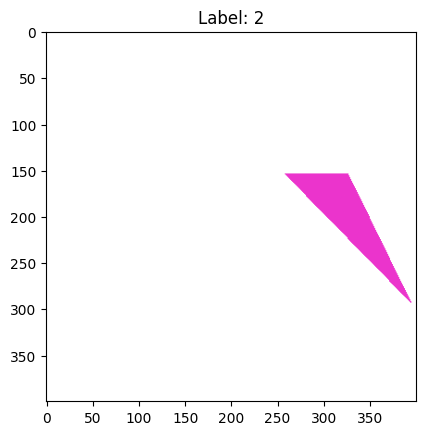

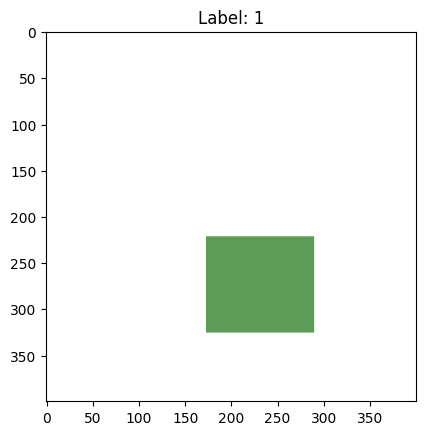

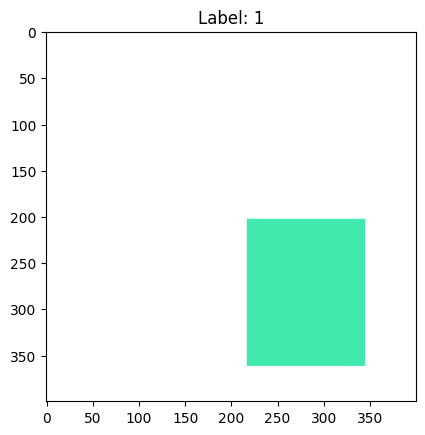

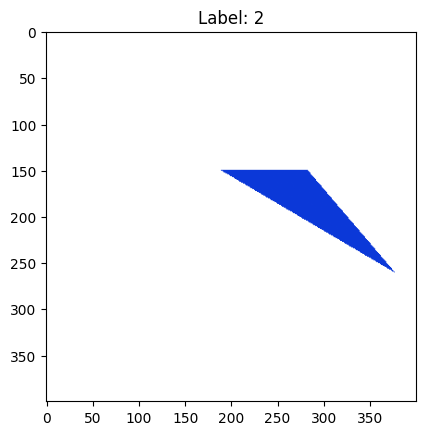

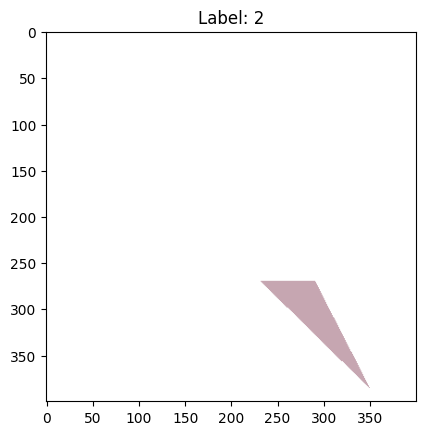

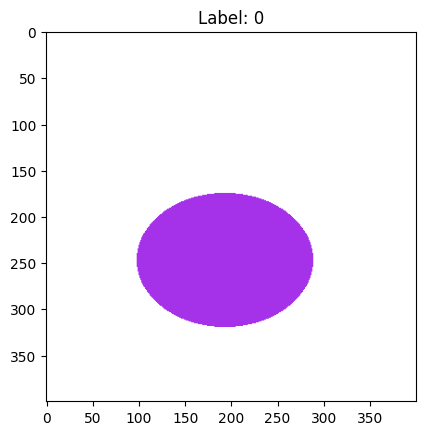

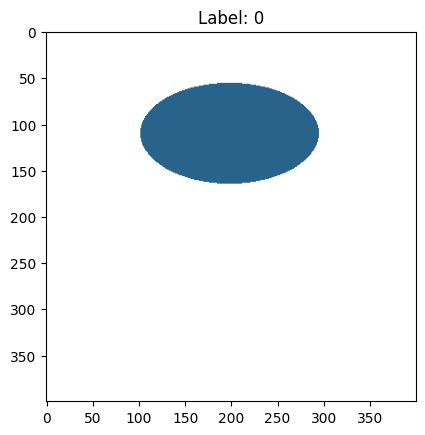

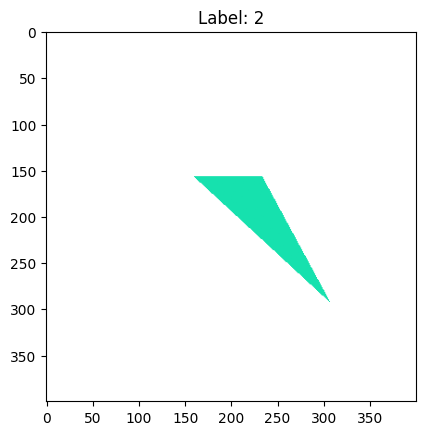

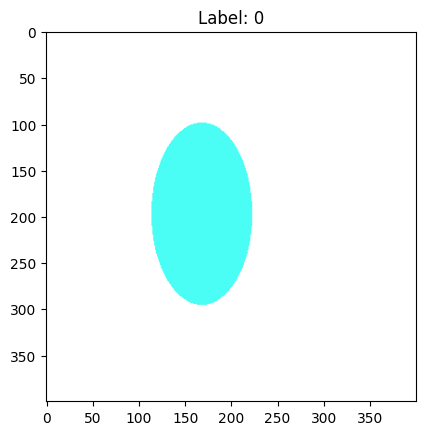

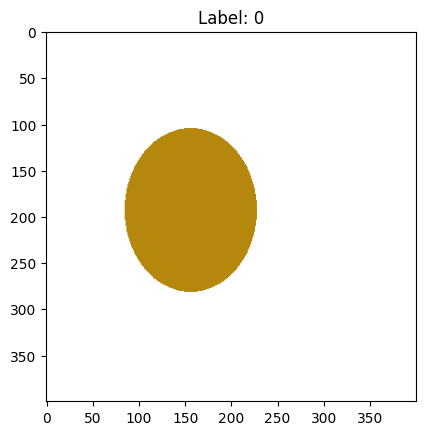

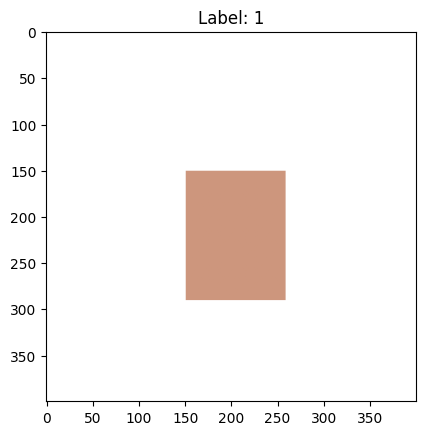

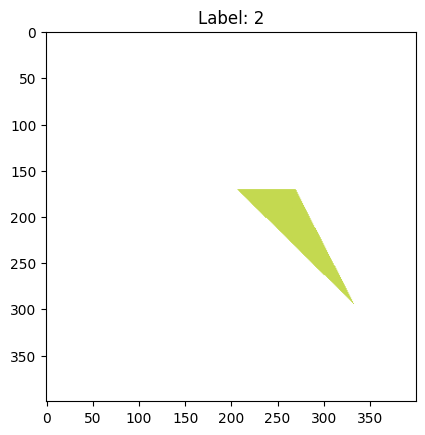

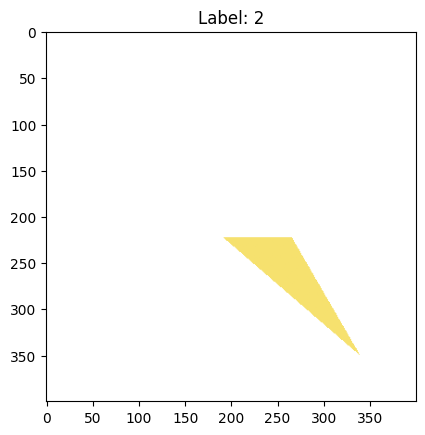

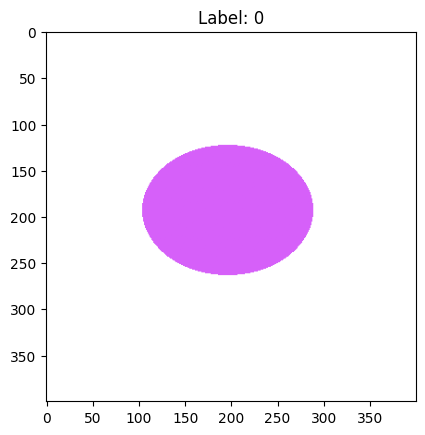

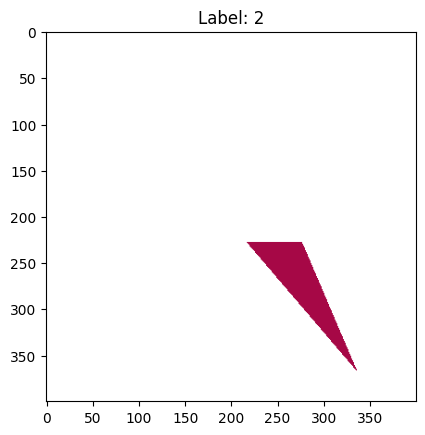

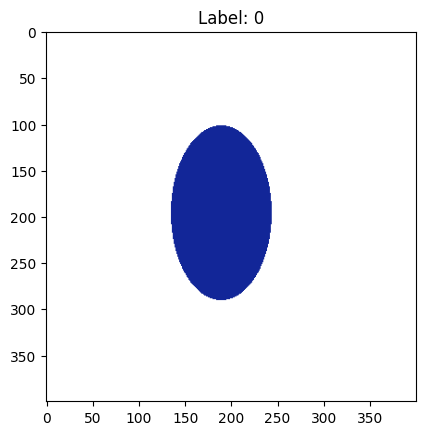

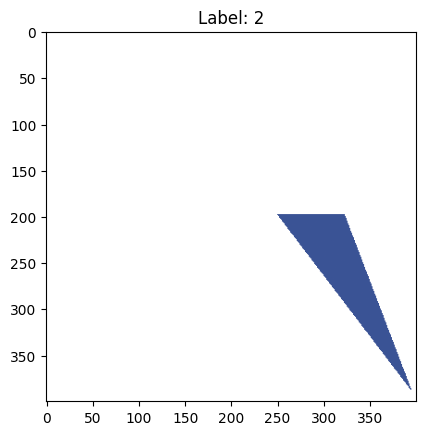

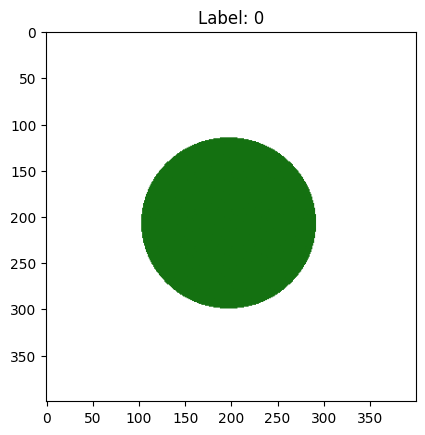

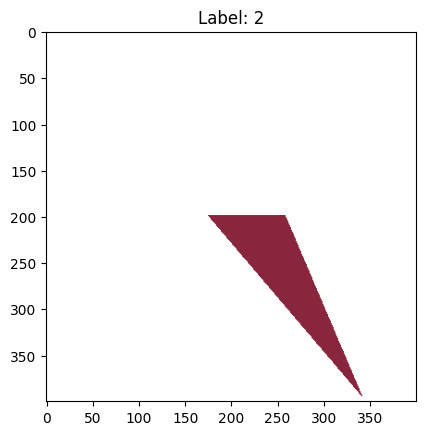

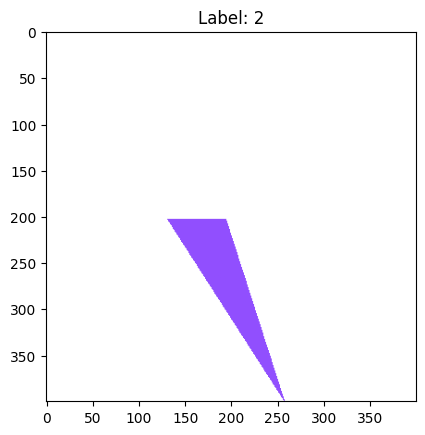

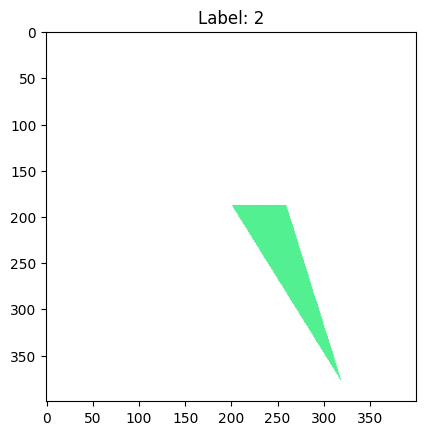

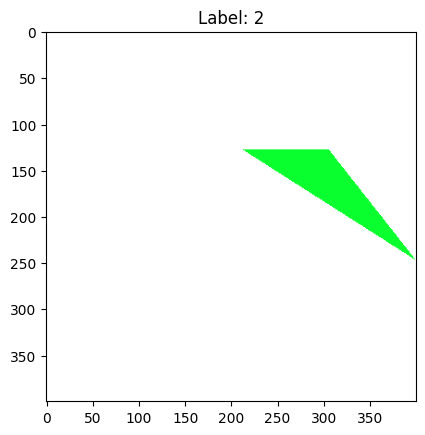

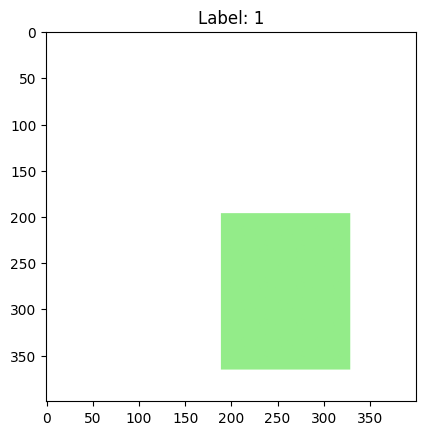

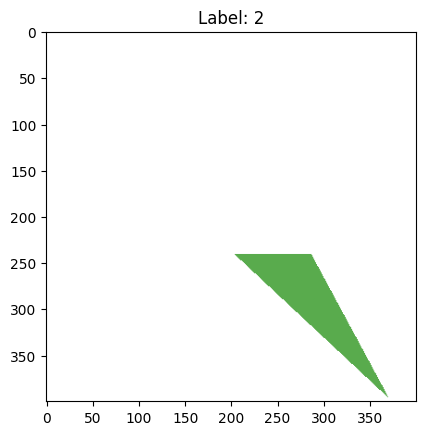

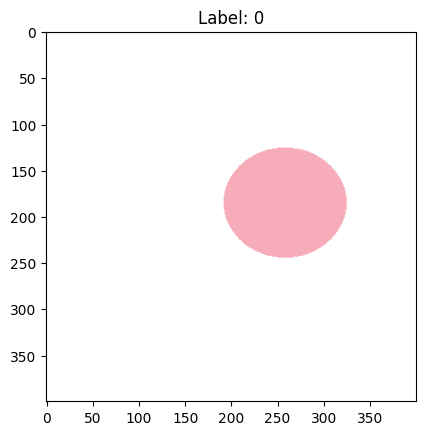

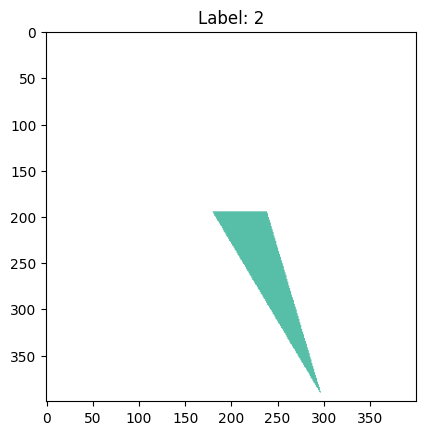

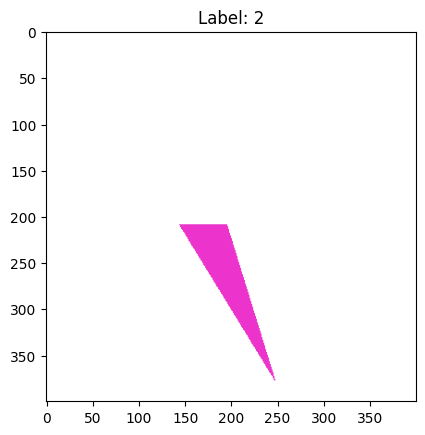

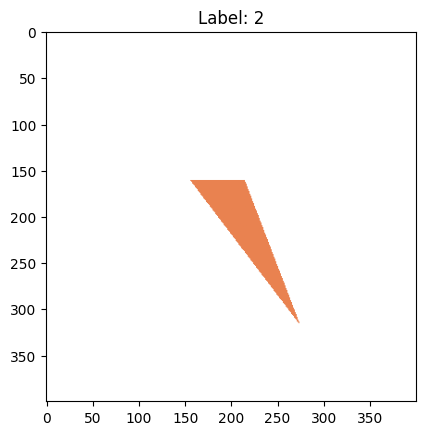

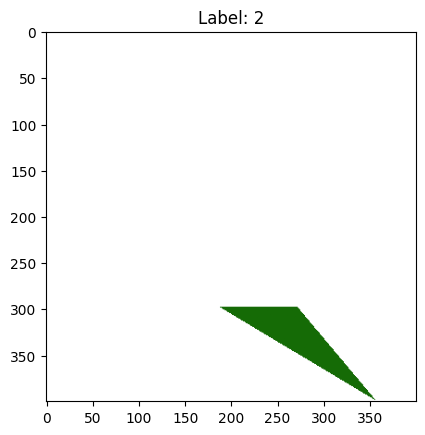

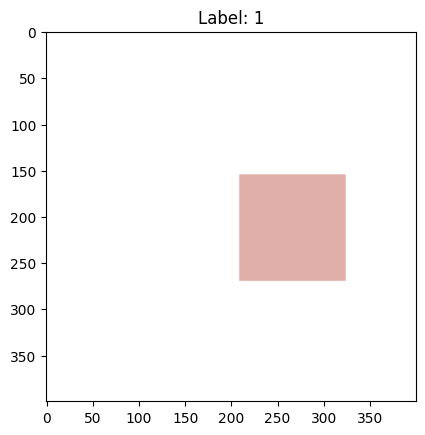

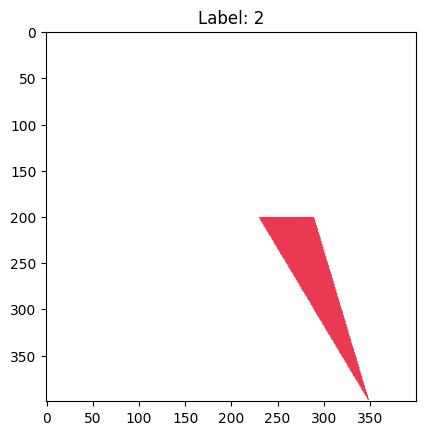

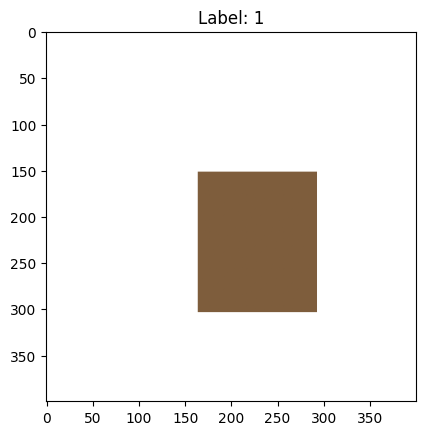

In [ ]:
# Visualize Images ne by one with labels

# Iterate over data loader
for batch in train_loader:
    # Get images and labels from the batch
    images, labels = batch
    
    # Visualize the images
    for i in range(images.size(0)):
        # Convert the image from tensor to numpy array
        image = images[i].numpy()
        
        # Undo the normalization transformation
        image = image * 0.5 + 0.5  # Assuming normalization mean=0.5 and std=0.5
        
        # Transpose image to (H, W, C) format
        image = np.transpose(image, (1, 2, 0))
        
        # Display image
        plt.imshow(image)
        plt.title(f'Label: {labels[i]}')
        plt.show()
        
    # Break after the first batch to visualize only a few images
    break


In [ ]:
# Define CNN model architecture

class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            # Input = 3 x 400 x 400, Output = 32 x 400 x 400
            torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            torch.nn.MaxPool2d(kernel_size=2),
            torch.nn.Flatten(),
            torch.nn.Linear(32 * 200 * 200, 512),  
            torch.nn.ReLU(),
            torch.nn.Linear(512, 3)
        )

    def forward(self, x):
        return self.model(x)



In [ ]:
# Select training device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
model = CNN().to(device)

cuda


In [ ]:
# Define Hyperparams
num_epochs = 32
learning_rate = 0.001

# Define Loss and Optimizer
criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  


Epoch 1/32: Training loss = 0.9734074331465221
Epoch 2/32: Training loss = 0.5341474432793875
Epoch 3/32: Training loss = 0.43619688422906966
Epoch 4/32: Training loss = 0.4114951069156329
Epoch 5/32: Training loss = 0.3720754169755512
Epoch 6/32: Training loss = 0.347213766641087
Epoch 7/32: Training loss = 0.3334457248685852
Epoch 8/32: Training loss = 0.31353065596213414
Epoch 9/32: Training loss = 0.27047511166523375
Epoch 10/32: Training loss = 0.3223362352166857
Epoch 11/32: Training loss = 0.2831337856394904
Epoch 12/32: Training loss = 0.27622767135737436
Epoch 13/32: Training loss = 0.2658790812369377
Epoch 14/32: Training loss = 0.2539076190146189
Epoch 15/32: Training loss = 0.26847549575188806
Epoch 16/32: Training loss = 0.26785653214606026
Epoch 17/32: Training loss = 0.22040572573268224
Epoch 18/32: Training loss = 0.20576823384515822
Epoch 19/32: Training loss = 0.24377020992456921
Epoch 20/32: Training loss = 0.2169785556930398
Epoch 21/32: Training loss = 0.2154651952

Text(0, 0.5, 'Training loss')

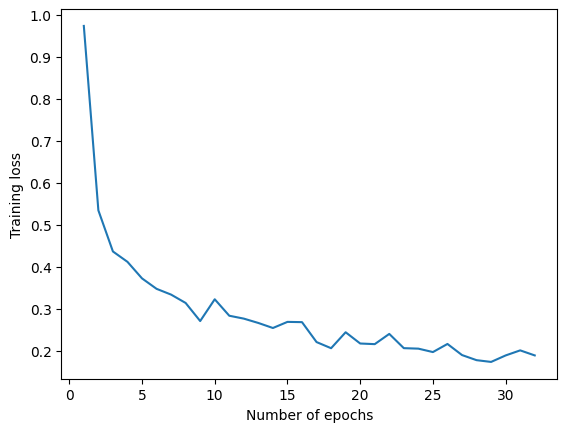

In [ ]:
# Training loop
train_loss_list = []
for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ')
    train_loss = 0
      
    #Iterating over the training dataset in batches
    model.train()
    for i, (images, labels) in enumerate(train_loader):
          
        #Extracting images and target labels for the batch being iterated
        images = images.to(device)
        labels = labels.to(device)
  
        #Calculating the model output and the cross entropy loss
        outputs = model(images)
        loss = criterion(outputs, labels)
  
        #Updating weights according to calculated loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
      
    #Printing loss for each epoch
    train_loss_list.append(train_loss/len(train_loader))
    print(f"Training loss = {train_loss_list[-1]}")   
      
#Plotting loss for all epochs
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Test set accuracy = 93.6 %
              precision    recall  f1-score   support

     Class 0       0.92      0.95      0.94       154
     Class 1       1.00      0.86      0.93       173
     Class 2       0.90      0.99      0.94       173

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



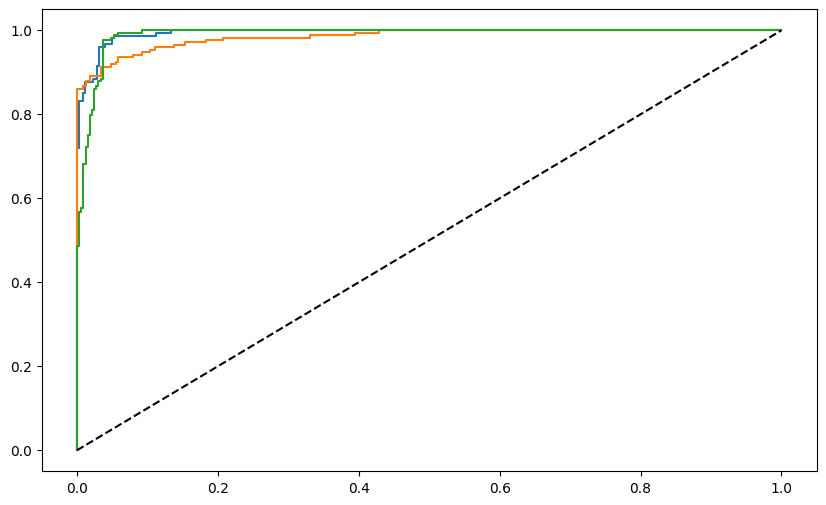

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve,auc
test_acc = 0
y_true_all = []
y_pred_all = []
y_scores_all = []
model.eval()

with torch.no_grad():
    # Iterating over the test dataset in batches
    for i, (images, labels) in enumerate(test_loader):

        images = images.to(device)
        y_true = labels.to(device)

        # Calculating outputs for the batch being iterated
        outputs = model(images)

        # Calculating predicted labels from models
        _, y_pred = torch.max(outputs.data, 1)

        # Comparing predicted and true labels
        test_acc += (y_pred == y_true).sum().item()

        # Append predicted and true labels for generating classification report
        y_true_all.extend(y_true.cpu().numpy())
        y_pred_all.extend(y_pred.cpu().numpy())

        # Extracting predicted scores (probabilities) for calculating AUC
        y_scores = torch.softmax(outputs, dim=1)
        y_scores_all.extend(y_scores.cpu().numpy())

    print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")

    # Generating classification report
    target_names = [f"Class {i}" for i in range(3)]  # Modify based on your class names
    print(classification_report(y_true_all, y_pred_all, target_names=target_names))

    # Calculating AUC
    y_scores_all = np.array(y_scores_all)
    auc_scores = roc_auc_score(y_true_all, y_scores_all, multi_class='ovr')  # Assuming multi-class classification

    # Plotting ROC curves
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_true_all, y_scores_all[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotting ROC curves for each class
    plt.figure(figsize=(10, 6))
    for i in range(3):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
